## t-SNE on MNIST dataset

## Homework

- Apply t-SNE to visualize the MNIST dataset (handwritten image) at the end of the notebook

  - Tune your t-SNE to get the best visualization
  - Report your hyperparameters
  - Also report your tuning procedure

## Note
1. You may need to adjust relevant hyperparameters of the t-SNE to get beautiful results. (it should clearly clump digits of the same kind together)

2. Write a report as a PDF including all necessary results and explanations. / How did you get the beautiful results.

3. Submit your google colab link

**Write a report as a PDF (including screen shots if needed).**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [4]:
print('X:', X.shape)
print('y:', y.shape)

X: (70000, 784)
y: (70000,)


### Samples from MNIST

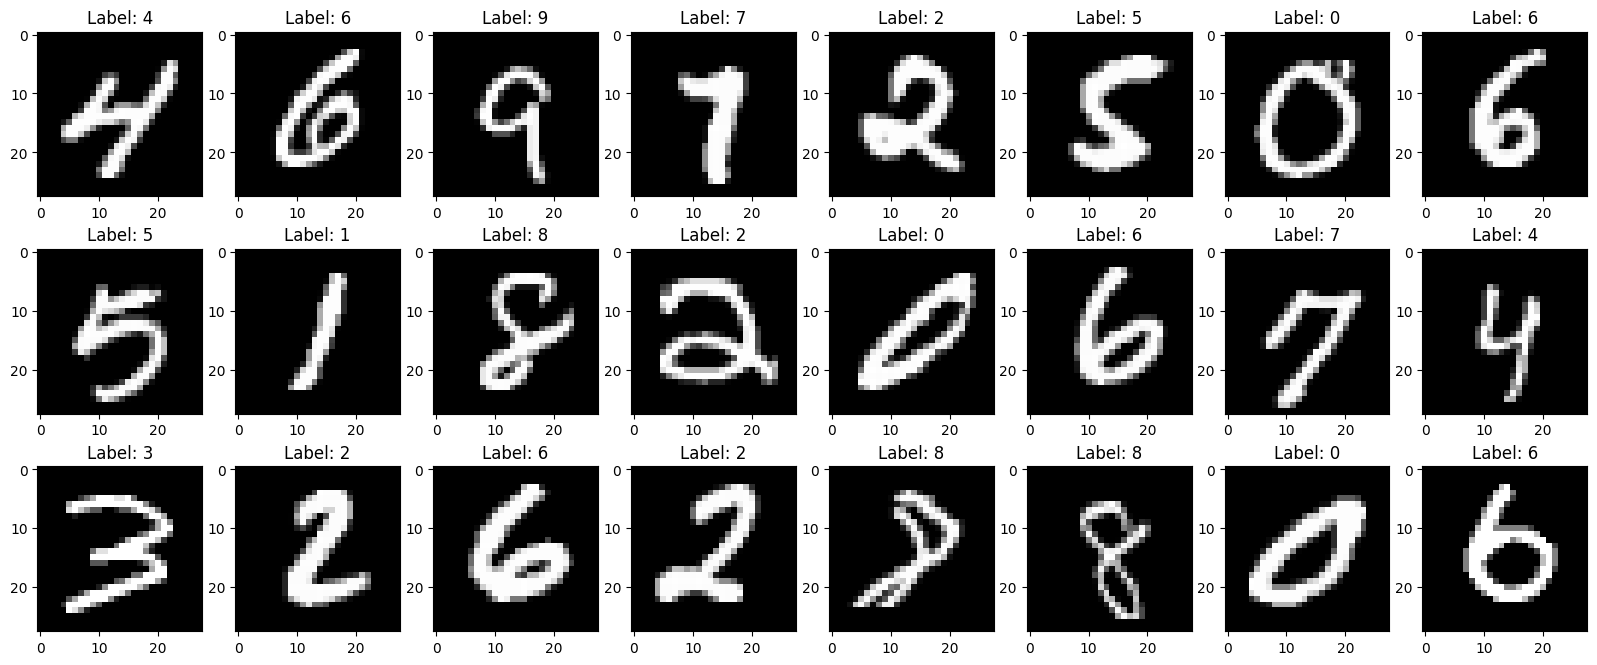

In [5]:
idx = np.random.choice(len(X), 24)
fig, ax = plt.subplots(3, 8, figsize=(20, 8))
ax = [*ax[0], *ax[1], *ax[2]]
for i in range(len(idx)):
  img = X[idx[i]].reshape(28, 28)
  ax[i].set_title(f'Label: {y[idx[i]]}')
  ax[i].imshow(img, cmap='gray')

## Selecting a small subset from the MNIST (t-SNE is too slow)

In [6]:
n = 3000
np.random.seed(42)
idx = np.random.choice(len(X), n)
Xs = X[idx]
ys = np.array([int(i) for i in y[idx]])
print('X:', Xs.shape)
print('Y:', ys.shape)
print(ys[:3])

X: (3000, 784)
Y: (3000,)
[0 0 1]


## Naively using PCA

from inclass [Link](https://colab.research.google.com/drive/1TxbIJ0S9XLEoGGlDUymZmrfuliLtZuXF?usp=sharing#scrollTo=vuqHM3ZxITY6)

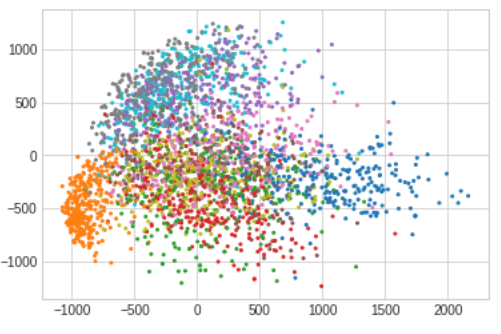

## t-SNE (Tasks)

## Alternative 1: Standardize X before t-SNE
idea: Iterate perplexity and evaluate with Kmean clustering

In [7]:
# Tune t-SNE to get the best visualization
# Standardize the data
scaler = StandardScaler()
_Xs = scaler.fit_transform(Xs)

_Xs.shape

(3000, 784)



> **model = TSNE(n_components = 2, perplexity = perplexity, random_state = 42, learning_rate = 1000, max_iter = 2500)**



In [10]:
colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])

Trying perplexity: 20


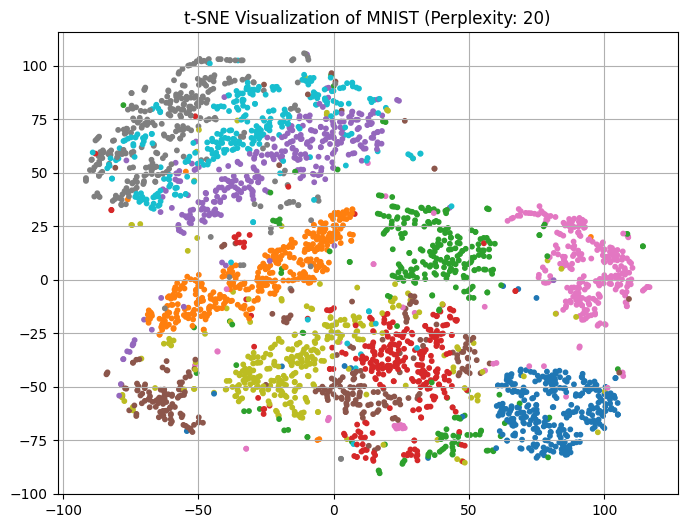

Trying perplexity: 21


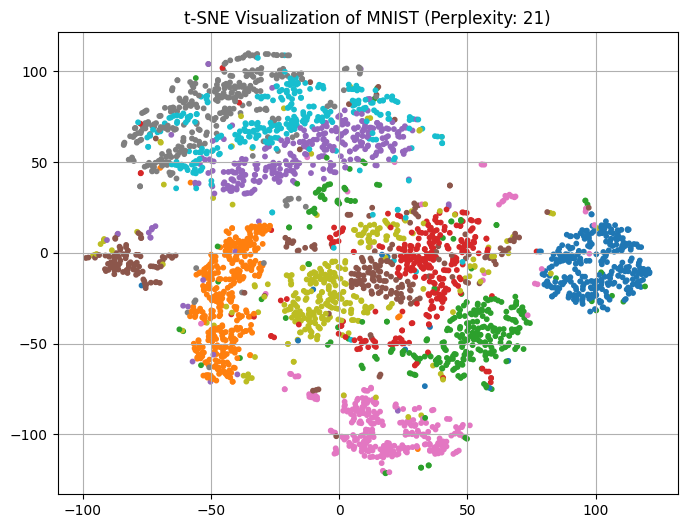

Trying perplexity: 22


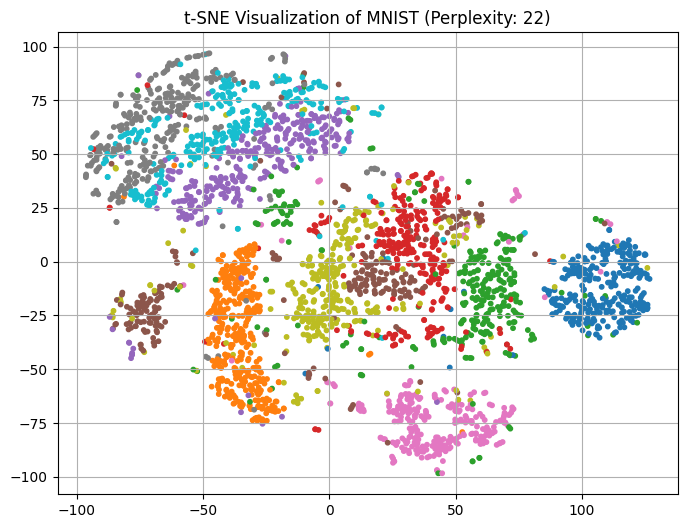

Trying perplexity: 23


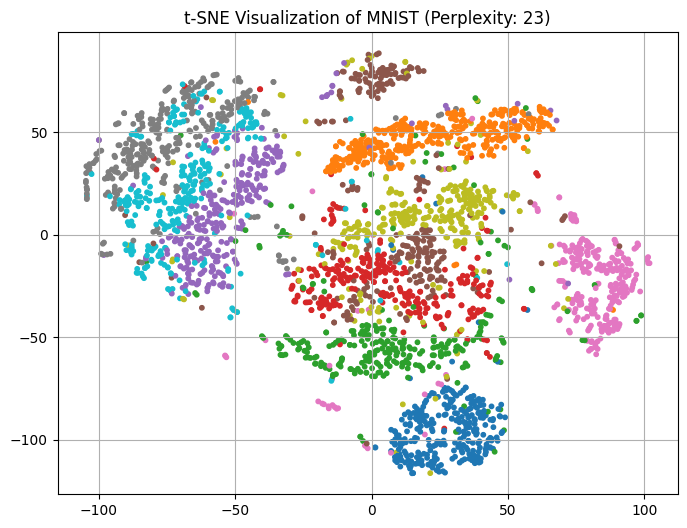

Trying perplexity: 24


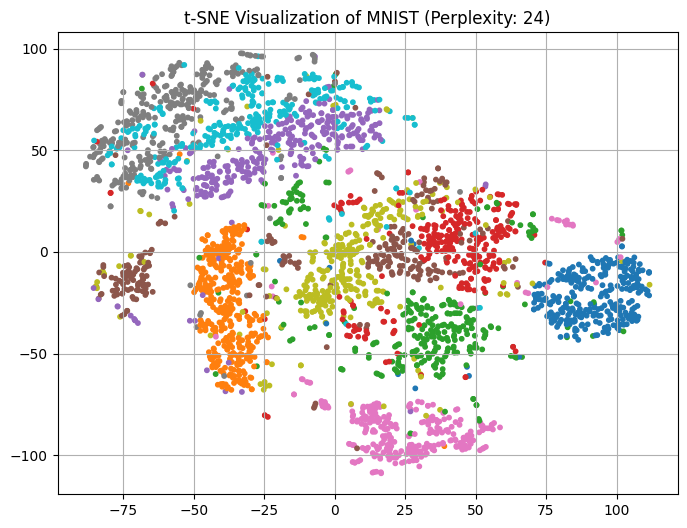

Trying perplexity: 25


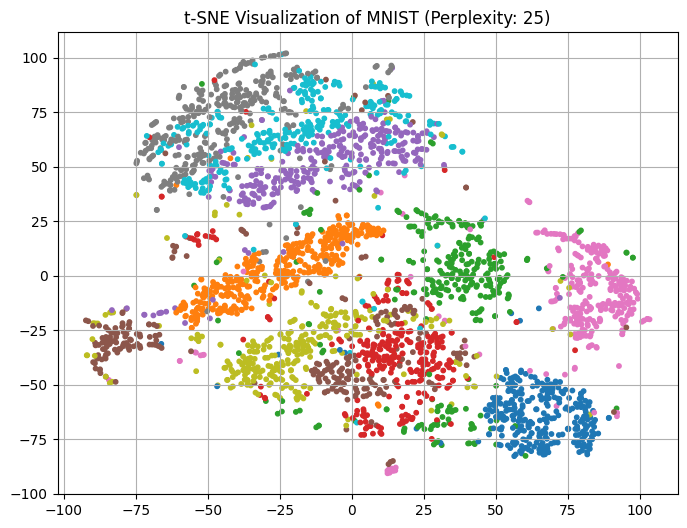

Trying perplexity: 28


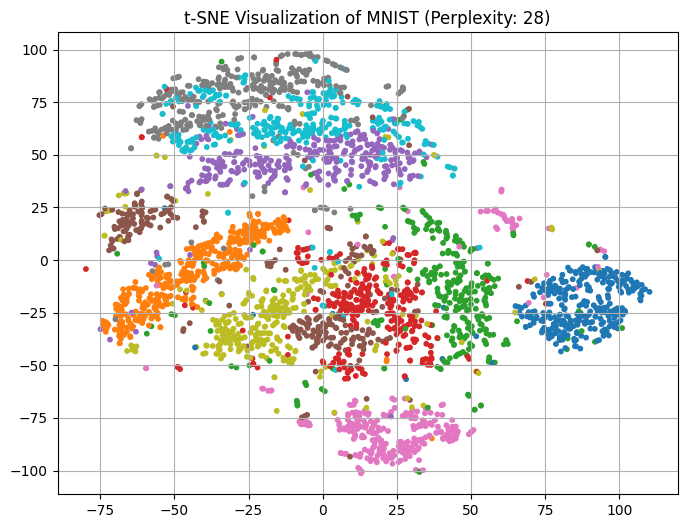

Trying perplexity: 30


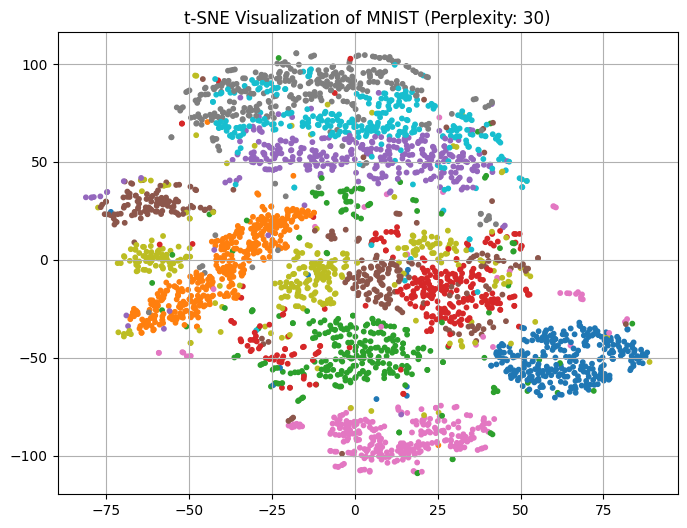

Trying perplexity: 31


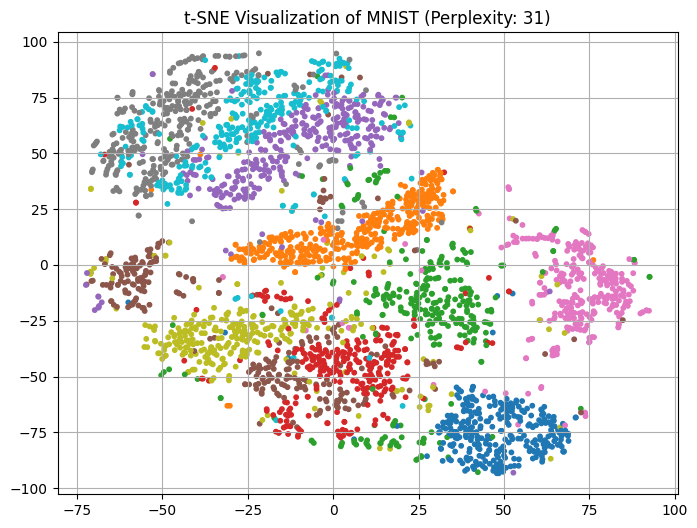

Trying perplexity: 32


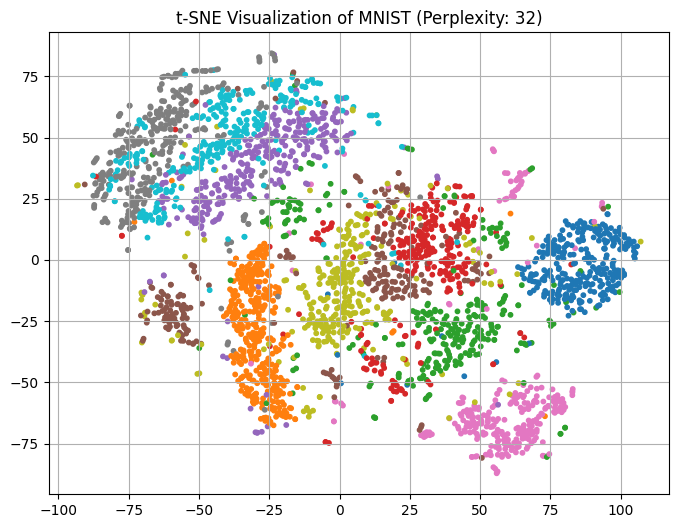

Trying perplexity: 33


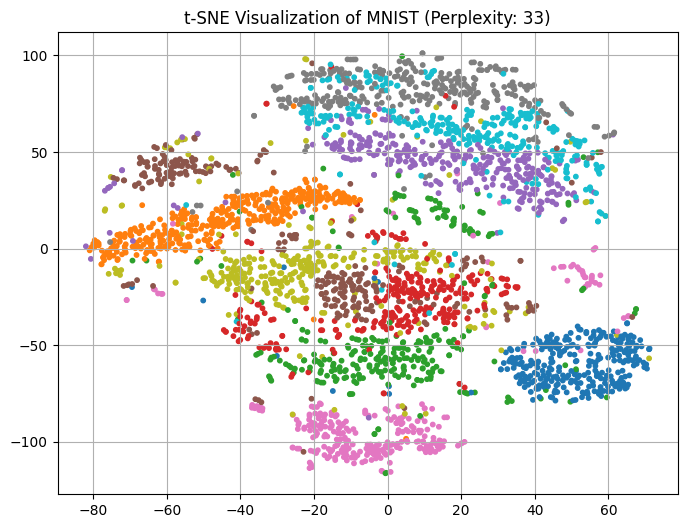

Trying perplexity: 34


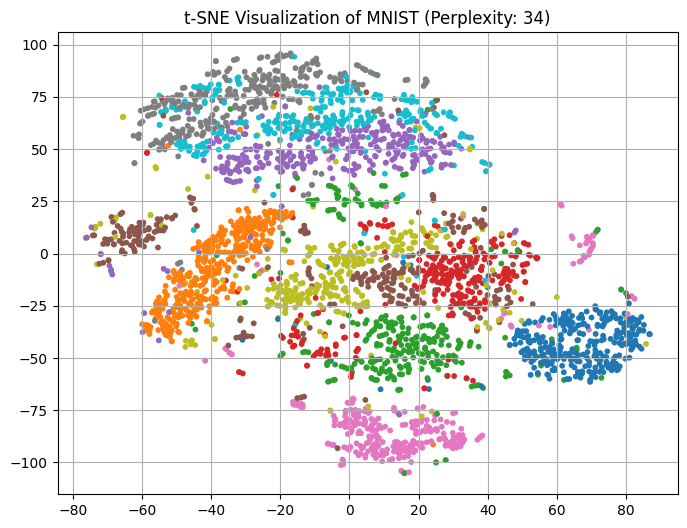

Trying perplexity: 35


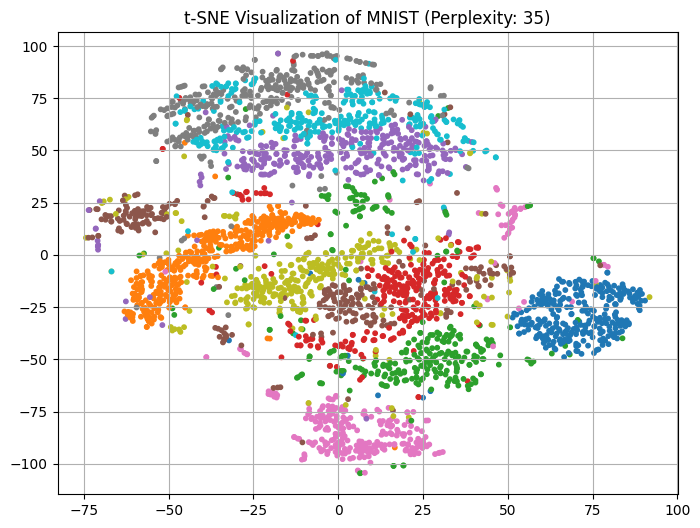

Trying perplexity: 40


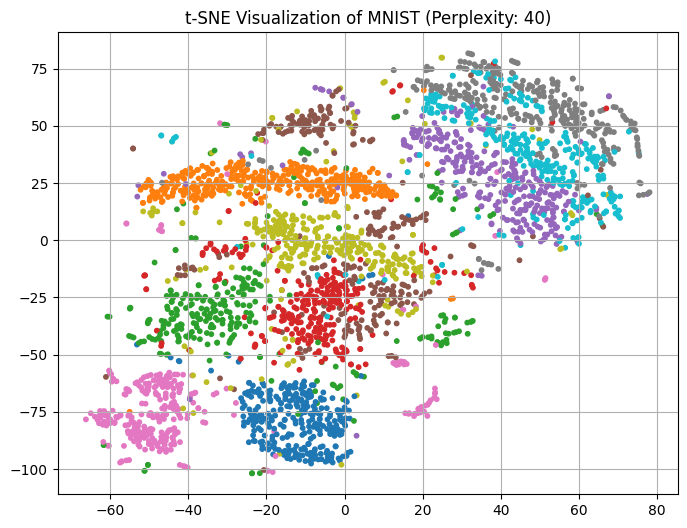

Trying perplexity: 41


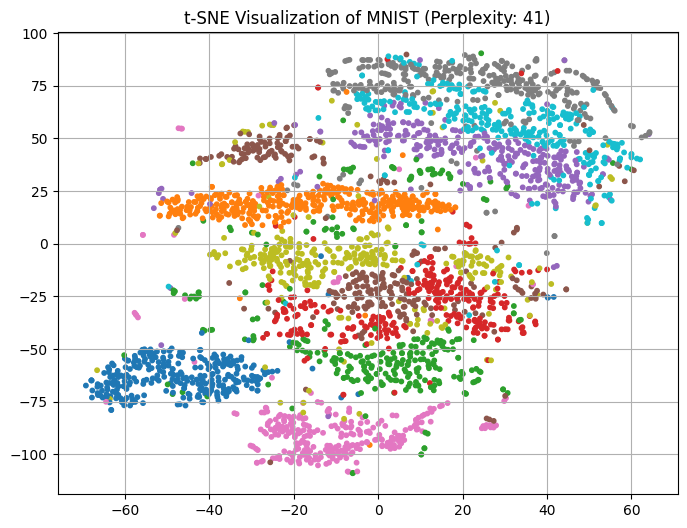

Trying perplexity: 42


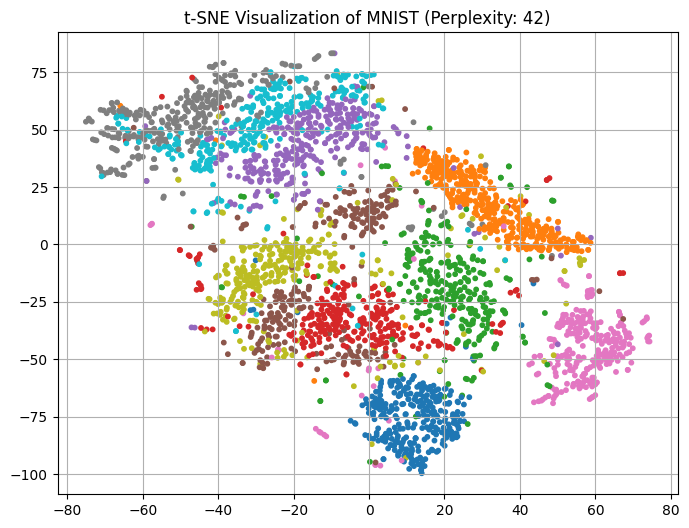

Trying perplexity: 43


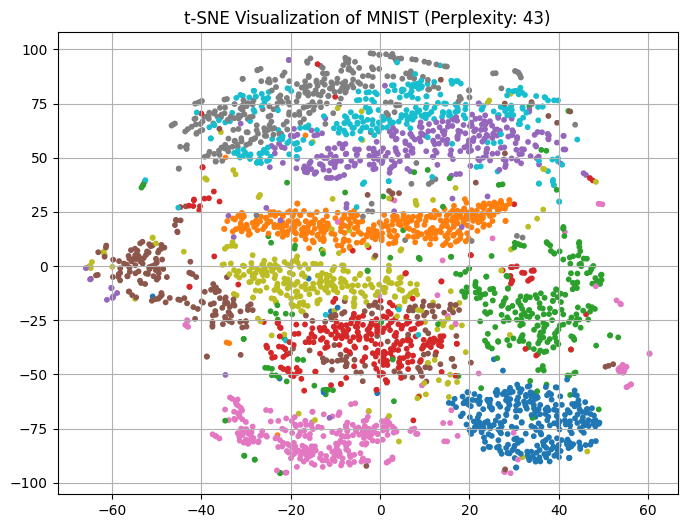

Trying perplexity: 44


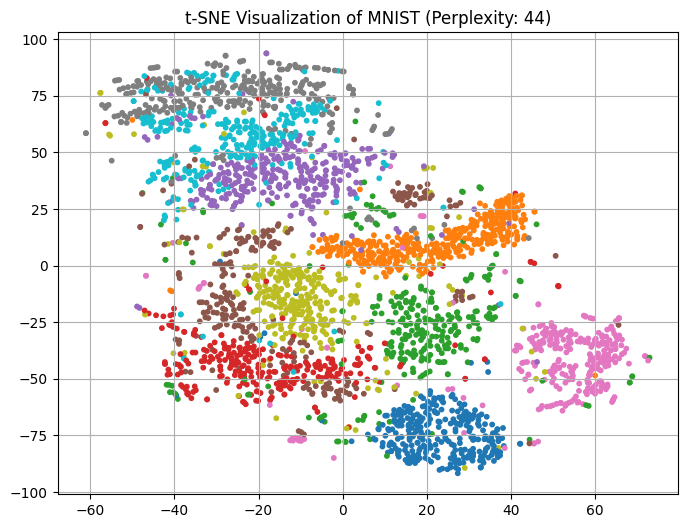

Trying perplexity: 45


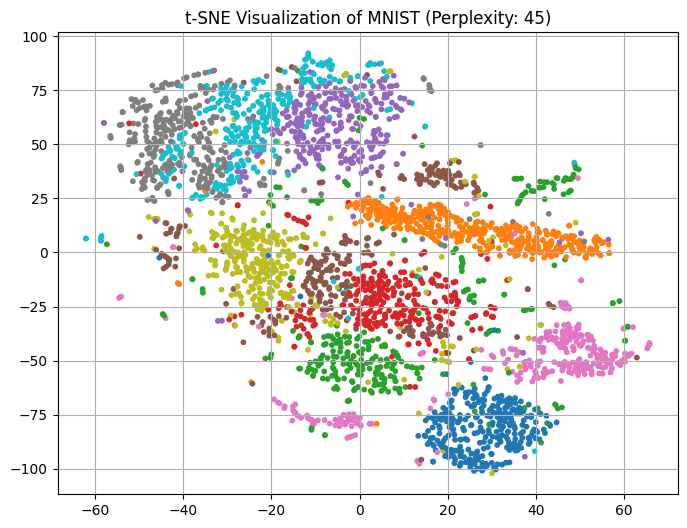

Trying perplexity: 50


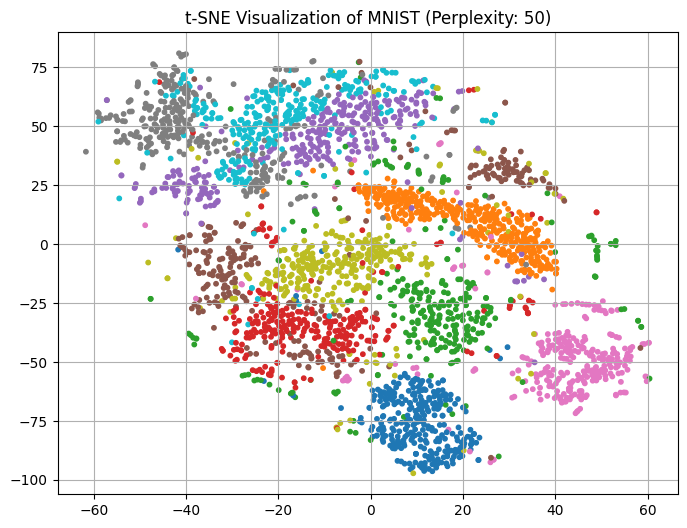

Trying perplexity: 60


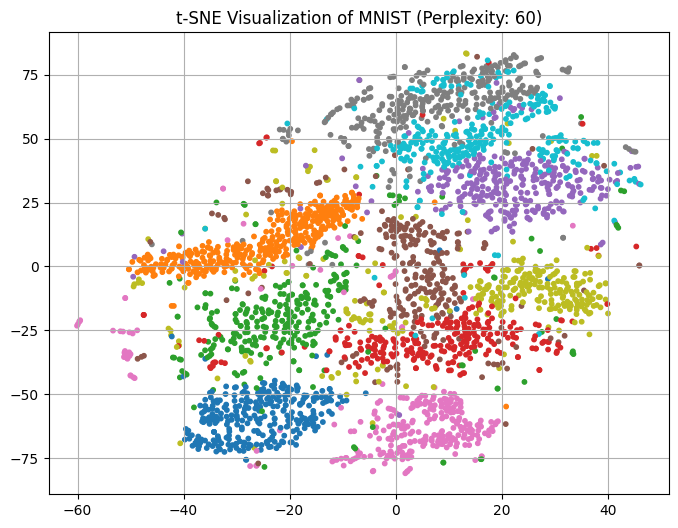

In [20]:
from sklearn.cluster import KMeans
# Iterate through perplexity values and evaluate perplexity
best_perplexity = None
min_perplexity_score = float('inf')
perplexity_score_list = {}
perplexity_values = [20, 21, 22, 23, 24, 25, 28, 30, 31, 32, 33, 34, 35, 40, 41, 42, 43, 44, 45, 50, 60]

for perplexity in perplexity_values:
    print(f"Trying perplexity: {perplexity}")
    model = TSNE(n_components = 2, perplexity = perplexity, random_state = 42, learning_rate = 1000, max_iter = 2500)
    _X = model.fit_transform(_Xs)

    # Evaluate perplexity with minimize kmeans.interia_
    kmeans = KMeans(n_clusters = 10, random_state = 42)
    kmeans.fit(_X)
    perplexity_score = kmeans.inertia_

    if perplexity_score < min_perplexity_score:
        min_perplexity_score = perplexity_score
        best_perplexity = perplexity

    perplexity_score_list[perplexity] = perplexity_score
    plt.figure(figsize=(8, 6))
    plt.scatter(_X[:, 0],  _X[:, 1], c=colors[ys], s = 10)
    plt.title(f"t-SNE Visualization of MNIST (Perplexity: {perplexity})")
    plt.grid(True)
    plt.savefig(f'tsne_mnist_{perplexity}.png')
    plt.show()

## Best Perplexity

#-----------------------------------------------------------------------------
Best perplexity found: 60
The change of perplexity


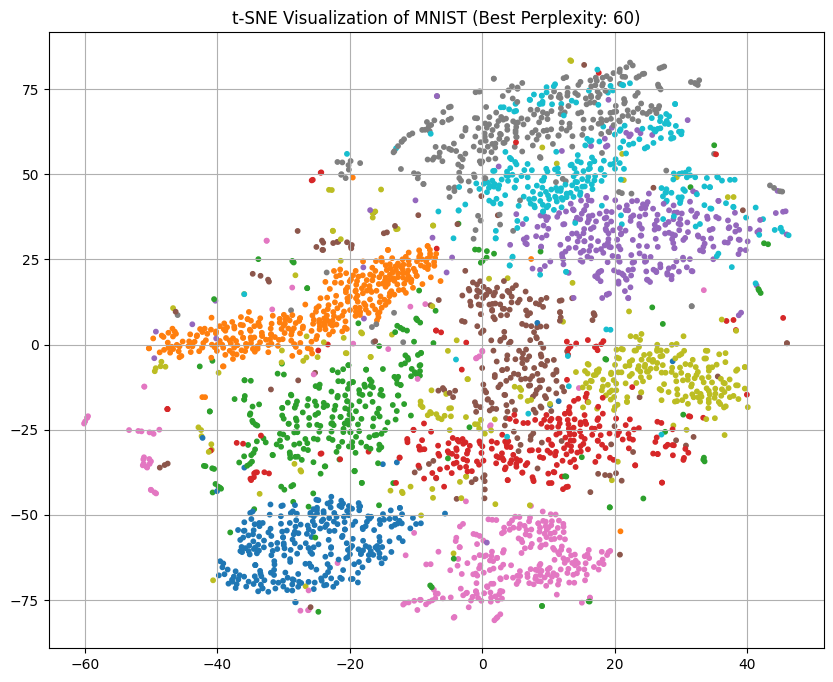

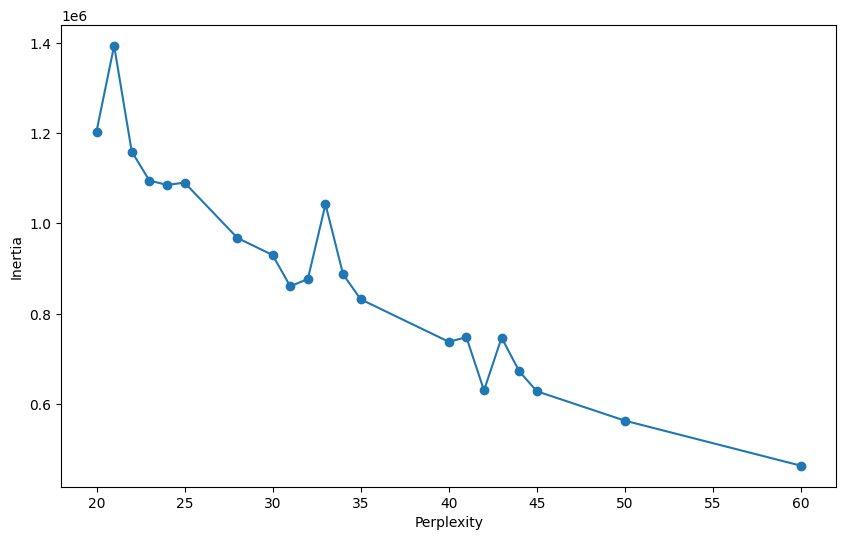

In [21]:
print("#-----------------------------------------------------------------------------")
print(f"Best perplexity found: {best_perplexity}")

# Use the best perplexity for your final t-SNE visualization
model = TSNE(n_components = 2, perplexity=best_perplexity, random_state = 42, learning_rate = 1000, max_iter = 2500)
_X = model.fit_transform(_Xs)

plt.figure(figsize=(10, 8))
plt.scatter(_X[:, 0], _X[:, 1], c=colors[ys], s=10)
plt.title(f"t-SNE Visualization of MNIST (Best Perplexity: {best_perplexity})")
plt.grid(True)
plt.savefig('tsne_mnist_best.png')

print(f"The change of perplexity")
# Plot the change of interia and perplexity
plt.figure(figsize=(10, 6))
plt.plot(list(perplexity_score_list.keys()), list(perplexity_score_list.values()), marker='o')
plt.xlabel('Perplexity')
plt.ylabel('Inertia')
plt.savefig('inertia_perplexity.png')
plt.show()

In [47]:
print('the inertia of best perplexity of alternative 1:', perplexity_score_list[best_perplexity])

the inertia of best perplexity of alternative 1: 462944.0


## Alternative 2: If you not standardize of x?

the alternative way, I don't standardize of X. I will use original of them to t-SNE.

In [22]:
x_subset = Xs[0:10000]
y_subset = ys[0:10000]

In [38]:
tsne = TSNE(random_state = 42, n_components = 2, perplexity = best_perplexity, max_iter = 2500).fit_transform(x_subset)

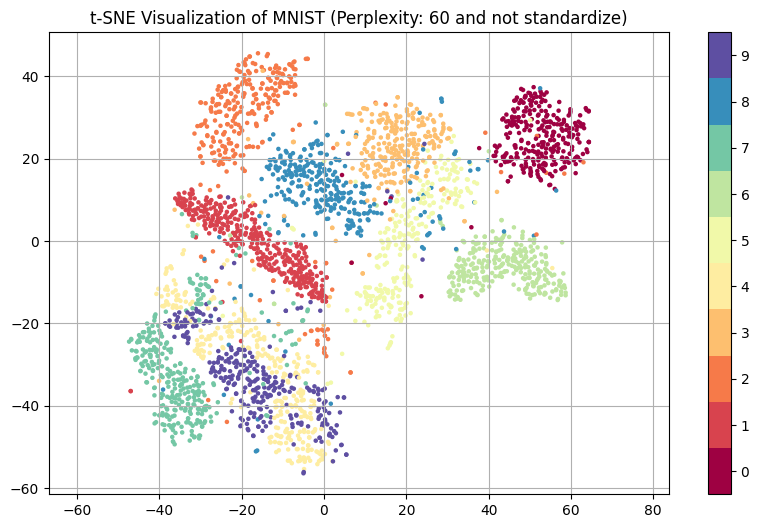

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne[:, 0], tsne[:, 1], s = 5, c = y_subset, cmap = 'Spectral')
plt.title('t-SNE Visualization of MNIST (Perplexity: 60 and not standardize)')
plt.gca().set_aspect('equal', 'datalim')
plt.grid(True)
plt.colorbar(boundaries=np.arange(11) - 0.5).set_ticks(np.arange(10))

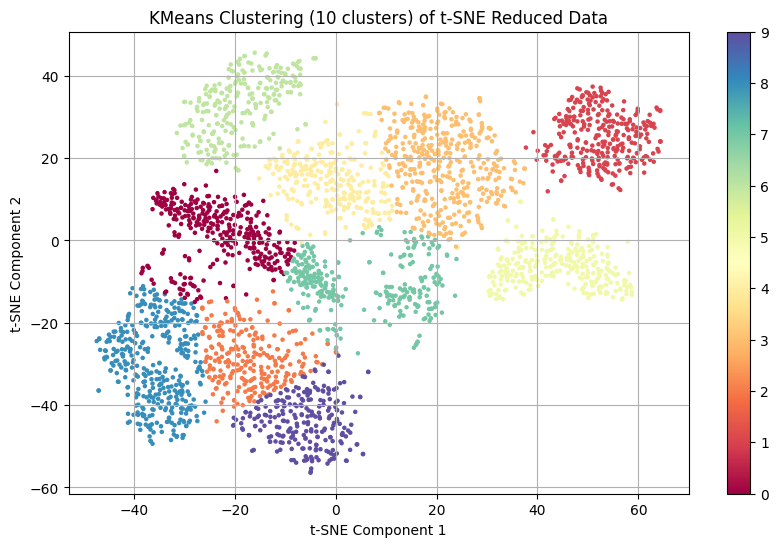

In [40]:
kmeans = KMeans(n_clusters = 10, random_state = 42)
kmeans_labels = kmeans.fit_predict(tsne)

plt.figure(figsize=(10, 6))
plt.scatter(tsne[:, 0], tsne[:, 1], c = kmeans_labels, cmap =  'Spectral', s = 5)
plt.title('KMeans Clustering (10 clusters) of t-SNE Reduced Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.colorbar()
plt.show()

In [41]:
kmeans.inertia_

296208.65625

## Compare, between the 2 alternatives

In [48]:
print('the inertia of best perplexity of alternative 1:', perplexity_score_list[best_perplexity])
print('the inertia of alternative 2:', kmeans.inertia_)

the inertia of best perplexity of alternative 1: 462944.0
the inertia of alternative 2: 296208.65625


Finally, the alternative 2, which is not standardize data is the better solution to t-SNE

---

# Summary

## t-SNE Visualization of MNIST with KMeans Evaluation

This notebook explores the use of t-SNE for visualizing the MNIST dataset and evaluates different perplexity values using KMeans clustering.

### Process Overview

1. **Data Loading and Preprocessing:**
   - The MNIST dataset is loaded using `fetch_openml`.
   - Two alternatives are explored:
     - **Alternative 1:** Standardize the data using `StandardScaler` before applying t-SNE.
     - **Alternative 2:** Do not standardize the data and apply t-SNE directly.
2. **t-SNE Parameter Tuning (Perplexity):**
   - A loop iterates through different perplexity values (defined in `perplexity_values`).
   - For each perplexity:
     - **t-SNE Transformation:** t-SNE is applied to the data with the current perplexity, `learning_rate = 1000`, `max_iter = 2500/3000`, and `random_state = 42`.
     - **KMeans Clustering:** KMeans clustering (with `n_clusters=10` and `random_state=42`) is performed on the t-SNE reduced data.
     - **Inertia Evaluation:** The KMeans inertia is calculated as a metric to evaluate the quality of the clustering for the given perplexity. Lower inertia generally indicates better clustering.
     - **Visualization:** A scatter plot is generated to visualize the t-SNE transformed data, colored by the true labels (digits 0-9).
   - The perplexity that results in the lowest KMeans inertia is chosen as the best perplexity.

3. **Final Visualization with Best Perplexity:**
   - Using the best perplexity found, t-SNE is applied again to the data.
   - The final visualization of the MNIST dataset in 2D space is created with the best perplexity.

4. **Analysis of Perplexity Impact:**
   - A plot shows the relationship between perplexity and the KMeans inertia.

5. **Comparison of Alternatives:**
   - The inertia of the best perplexity for Alternative 1 and the inertia for Alternative 2 are compared.

### Hyperparameters

- **t-SNE:**
    - `n_components = 2`
    - `learning_rate = 1000`
    - `max_iter = 2500/3000`
    - `random_state = 42`
- **Perplexity:** Iterated through `perplexity_values = [20, 21, 22, 23, 24, 25, 28, 30, 31, 32, 33, 34, 35, 40, 41, 42, 43, 44, 45, 50, 60]`. The best perplexity is selected based on minimizing the KMeans inertia.
- **KMeans:** `n_clusters = 10`, `random_state = 42`

### Tuning Procedure

1. **Iterate through Perplexity Values:** The code iterates through a range of perplexity values to identify the one that produces the best visualization and clustering.
2. **Evaluate with KMeans:** For each perplexity value, t-SNE is applied to the data, and the resulting 2D representation is clustered using KMeans.
3. **Minimize KMeans Inertia:** The KMeans inertia is used as a metric to evaluate the clustering quality. The perplexity that minimizes inertia is considered the best choice.
4. **Visualization:** Scatter plots are generated for each perplexity to visually assess the clustering quality.
5. **Final Visualization:** The best perplexity is used to create the final t-SNE visualization of the MNIST dataset.

### Results

The code produces:

- **Scatter Plots:** A series of scatter plots showing the 2D representation of the MNIST data after t-SNE transformation for each perplexity value.
- **Best Perplexity:** The perplexity value that minimizes the KMeans inertia is reported.
- **Final Visualization:** A scatter plot using the best perplexity showing the 2D representation of the MNIST data.
- **Perplexity vs. Inertia Plot:** A plot demonstrating how the KMeans inertia changes with different perplexity values.
- **Comparison of Alternatives:** The inertia for both alternatives is reported to determine which approach provides better results.

### How to achieve beautiful results?

The good results are achieved by carefully tuning the t-SNE hyperparameters, specifically the perplexity. The perplexity parameter controls the local neighborhood size used by t-SNE. By iterating through different perplexity values and evaluating the resulting clustering quality with KMeans inertia, we are able to find a perplexity that optimally balances local and global structure in the data.

Additionally, exploring alternative approaches like standardizing or not standardizing the data before applying t-SNE can influence the visualization and clustering performance, and it is important to compare these approaches.

By utilizing the combination of t-SNE, KMeans and evaluating the results visually, we are able to obtain an effective and insightful visualization of the complex structure within the MNIST dataset.
